In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#allFiles = ["data/CMAPSSData/train_FD001.txt", "data/CMAPSSData/train_FD002.txt", "data/CMAPSSData/train_FD003.txt", "data/CMAPSSData/train_FD004.txt"]

In [3]:
#df = pd.concat([pd.read_table(file_path, sep = " ", header=None) for file_path in allFiles])

In [4]:
df = pd.read_csv('data/CMAPSSData/train_FD001.txt', sep =' ', header=None)
df[0] = df[0].astype(str)
col_names = ["unit", "time", "operational_setting_1", "operational_setting_2", "operational_setting_3"]
for i in xrange(1,24):
    col_names.append("sensor_measurement_" + str(i))
df.columns = col_names
df.drop(['sensor_measurement_22', "sensor_measurement_23"], axis=1, inplace=True)

#### Summary Statisictics on # of cycles for a unit

Min is 128
Avg is 206
Max is 362
Std is 46


(array([  7.,  18.,  24.,  24.,  10.,   5.,   7.,   2.,   1.,   2.]),
 array([ 128. ,  151.4,  174.8,  198.2,  221.6,  245. ,  268.4,  291.8,
         315.2,  338.6,  362. ]),
 <a list of 10 Patch objects>)

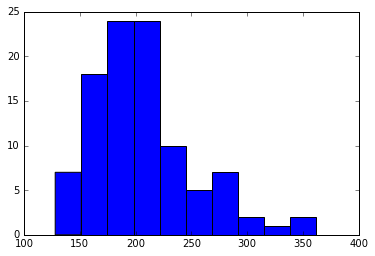

In [5]:
print "Min is %d" %min(df.groupby(["unit"])["time"].count())
print "Avg is %d" %np.mean(df.groupby(["unit"])["time"].count())
print "Max is %d" %max(df.groupby(["unit"])["time"].count())
print "Std is %d" %np.std(df.groupby(["unit"])["time"].count())
plt.hist(df.groupby(["unit"])["time"].count())

#### Count of Null Values in the dataframe

In [6]:
sum([df[i].isnull().sum() for i in df.columns])

0

## Test Dataset

In [7]:
df_test = pd.read_csv('data/CMAPSSData/test_FD001.txt', sep =' ', header=None)
df_test.columns = col_names
df_test.drop(['sensor_measurement_22', "sensor_measurement_23"], axis=1, inplace=True)

Min is 31
Avg is 130
Max is 303
Std is 53
There are 0 null values in this dataframe


(array([ 12.,  12.,  11.,  19.,  23.,  11.,   8.,   3.,   0.,   1.]),
 array([  31. ,   58.2,   85.4,  112.6,  139.8,  167. ,  194.2,  221.4,
         248.6,  275.8,  303. ]),
 <a list of 10 Patch objects>)

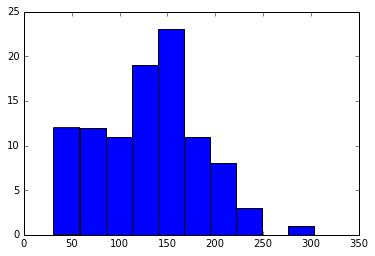

In [8]:
df_test["unit"] = df_test["unit"].astype(str)
print "Min is %d" %min(df_test.groupby(["unit"])["time"].count())
print "Avg is %d" %np.mean(df_test.groupby(["unit"])["time"].count())
print "Max is %d" %max(df_test.groupby(["unit"])["time"].count())
print "Std is %d" %np.std(df_test.groupby(["unit"])["time"].count())
print "There are %d null values in this dataframe" %sum([df[i].isnull().sum() for i in df.columns])
plt.hist(df_test.groupby(["unit"])["time"].count())


## Functions for time series trending of Sensors and Operational Settings column

#### Time series graph of the 3 operational settings columns from 4 random machines

In [9]:
def operational_settings_time_series(df, machines, label):

    fig, axes = plt.subplots(figsize=(10,10), nrows=3, ncols=1)
    for i in xrange(0,3):
        col_name = "operational_setting_" + str(i+1)
        axes[i].plot(df[df['unit'] == str(machines[0])]['time'], df[df['unit'] == str(machines[0])][col_name], 'b') 
        axes[i].plot(df[df['unit'] == str(machines[1])]['time'], df[df['unit'] == str(machines[1])][col_name], 'r')
        axes[i].plot(df[df['unit'] == str(machines[2])]['time'], df[df['unit'] == str(machines[2])][col_name], 'g')
        axes[i].plot(df[df['unit'] == str(machines[3])]['time'], df[df['unit'] == str(machines[3])][col_name], 'y')
        axes[i].set_xlabel("time")
        axes[i].set_ylabel(col_name)
    fig_name = "operational_settings_" + label + ".png"
    plt.savefig(fig_name)

#### Time series graph of sensor measurements from 4 random machines

In [10]:
def sensors_time_series(df, machines, label):

    fig, axes = plt.subplots(figsize=(12,12), nrows=7, ncols=1, sharex=True)

    for i in xrange(7):
        col_name = "sensor_measurement_" + str(i+1)
        axes[i].plot(df[df['unit'] == str(machines[0])]['time'], df[df['unit'] == str(machines[0])][col_name], 'b') 
        axes[i].plot(df[df['unit'] == str(machines[1])]['time'], df[df['unit'] == str(machines[1])][col_name], 'r')
        axes[i].plot(df[df['unit'] == str(machines[2])]['time'], df[df['unit'] == str(machines[2])][col_name], 'g')
        axes[i].plot(df[df['unit'] == str(machines[3])]['time'], df[df['unit'] == str(machines[3])][col_name], 'y')
        axes[i].set_ylabel("sensor_" + str(i+1))
    fig_name = "sensor_measurements_" + label + "_1.png"
    fig.savefig(fig_name)

    fig, axes = plt.subplots(figsize=(12,12), nrows=7, ncols=1, sharex=True)

    for i in xrange(7,14):
        col_name = "sensor_measurement_" + str(i+1)
        axes[i-7].plot(df[df['unit'] == str(machines[0])]['time'], df[df['unit'] == str(machines[0])][col_name], 'b') 
        axes[i-7].plot(df[df['unit'] == str(machines[1])]['time'], df[df['unit'] == str(machines[1])][col_name], 'r')
        axes[i-7].plot(df[df['unit'] == str(machines[2])]['time'], df[df['unit'] == str(machines[2])][col_name], 'g')
        axes[i-7].plot(df[df['unit'] == str(machines[3])]['time'], df[df['unit'] == str(machines[3])][col_name], 'y')
        axes[i-7].set_ylabel("sensor_" + str(i+1))
    
    fig_name = "sensor_measurements_" + label + "_2.png"
    fig.savefig(fig_name)

    fig, axes = plt.subplots(figsize=(12,12), nrows=7, ncols=1, sharex=True)

    for i in xrange(14,21):
        col_name = "sensor_measurement_" + str(i+1)
        axes[i-14].plot(df[df['unit'] == str(machines[0])]['time'], df[df['unit'] == str(machines[0])][col_name], 'b') 
        axes[i-14].plot(df[df['unit'] == str(machines[1])]['time'], df[df['unit'] == str(machines[1])][col_name], 'r')
        axes[i-14].plot(df[df['unit'] == str(machines[2])]['time'], df[df['unit'] == str(machines[2])][col_name], 'g')
        axes[i-14].plot(df[df['unit'] == str(machines[3])]['time'], df[df['unit'] == str(machines[3])][col_name], 'y')
        axes[i-14].set_ylabel("sensor_" + str(i+1))
    fig_name = "sensor_measurements_" + label + "_3.png"
    fig.savefig(fig_name)

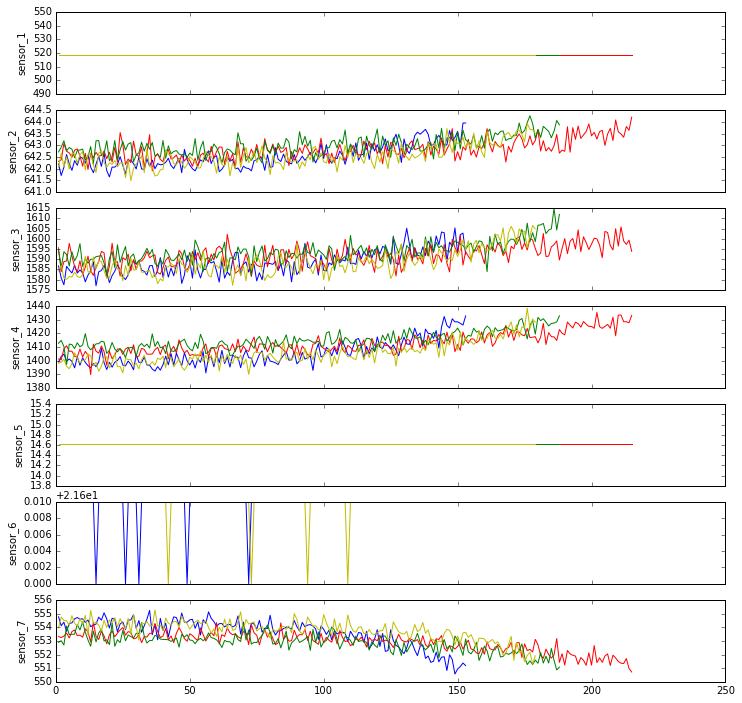

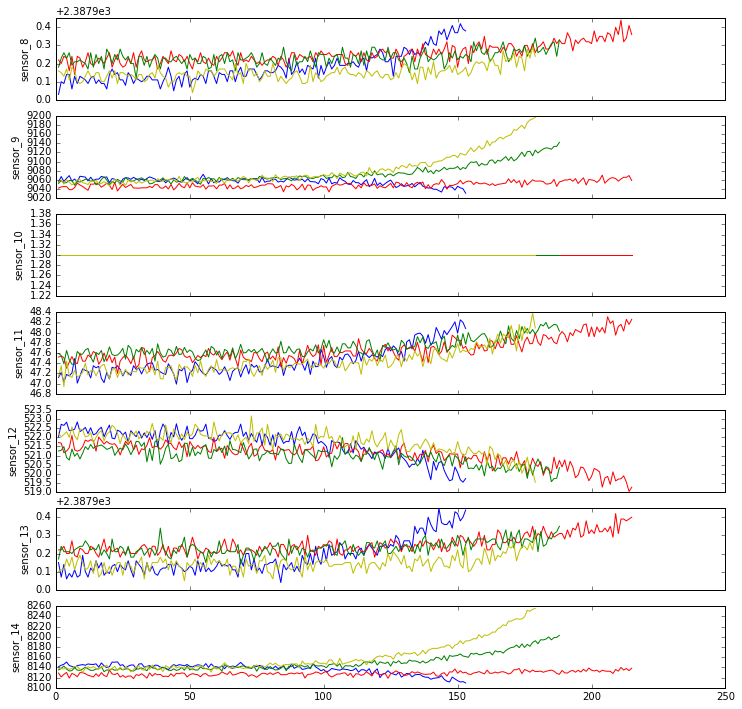

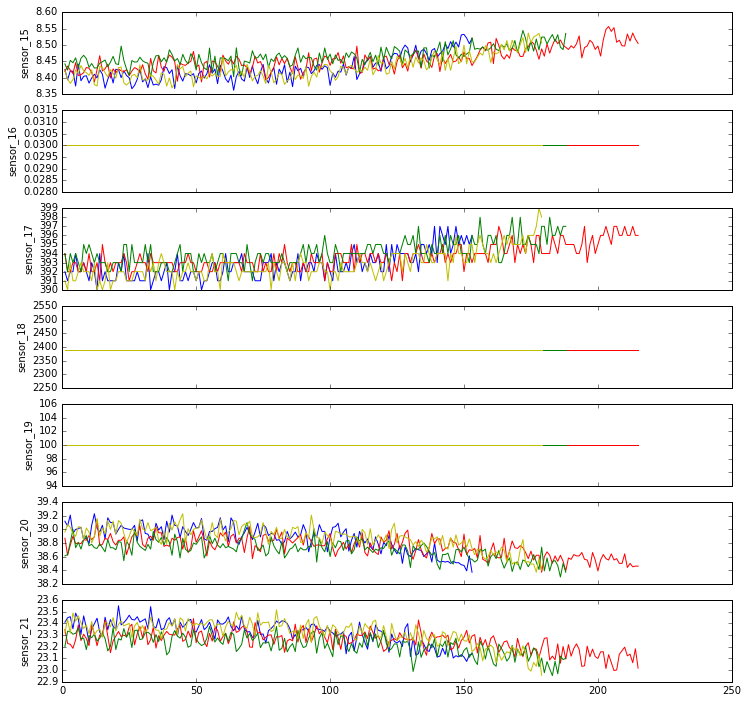

In [11]:
machines = np.random.choice(xrange(100), 4).tolist()
sensors_time_series(df, machines, "train")

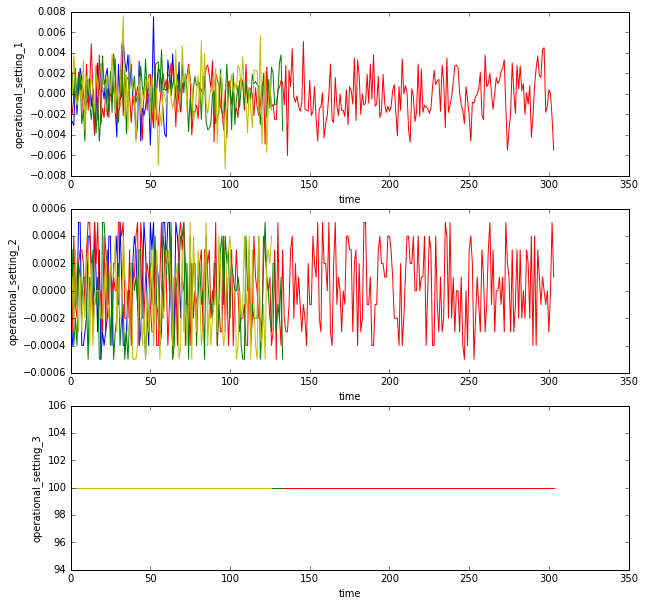

In [12]:
operational_settings_time_series(df_test, machines, "test")

In [13]:
df.operational_setting_3

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
5        100.0
6        100.0
7        100.0
8        100.0
9        100.0
10       100.0
11       100.0
12       100.0
13       100.0
14       100.0
15       100.0
16       100.0
17       100.0
18       100.0
19       100.0
20       100.0
21       100.0
22       100.0
23       100.0
24       100.0
25       100.0
26       100.0
27       100.0
28       100.0
29       100.0
         ...  
20601    100.0
20602    100.0
20603    100.0
20604    100.0
20605    100.0
20606    100.0
20607    100.0
20608    100.0
20609    100.0
20610    100.0
20611    100.0
20612    100.0
20613    100.0
20614    100.0
20615    100.0
20616    100.0
20617    100.0
20618    100.0
20619    100.0
20620    100.0
20621    100.0
20622    100.0
20623    100.0
20624    100.0
20625    100.0
20626    100.0
20627    100.0
20628    100.0
20629    100.0
20630    100.0
Name: operational_setting_3, dtype: float64